In [2]:
import pandas as pd

MAX_PRICE = 100000


In [3]:
products = pd.read_json("data/products.jsonl", lines=True)
print(products.shape[0])
products.loc[products["price"] < 0, "price"] *= -1
products = products[products["price"] < MAX_PRICE]
products["category_path"] = products["category_path"].str.rsplit(';', n=1, expand=True)[1]
products.rename(columns={"category_path": "category"}, inplace=True)
products.to_json("data/products_clean.jsonl", orient='records', lines=True)
print(products.shape[0])


319
308


In [4]:
    sessions = pd.read_json("data/sessions.jsonl", lines=True)
    products = pd.read_json("data/products_clean.jsonl", lines=True)
    print(sessions.shape[0])
    sessions = sessions[sessions["product_id"].isin(products["product_id"])]
    sessions = sessions.fillna({"user_id": sessions.groupby("session_id")["user_id"].transform('median')})
    sessions = sessions.dropna(subset=["user_id"])
    print(sessions.shape[0])
    sessions = sessions.astype({'user_id': 'int32', 'product_id': 'int32', 'purchase_id': "Int64"}, errors='ignore')
    sessions.to_json("data/sessions_clean.jsonl", orient='records', lines=True)

56883
53278


[ 9  1  1 ...  8  1 10]


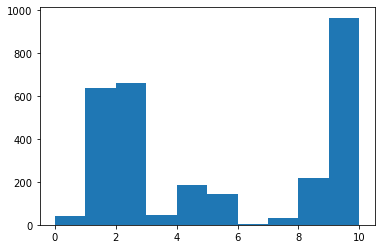

In [9]:
bought = sessions[sessions["event_type"] == "BUY_PRODUCT"]
views = sessions[sessions["event_type"] == "VIEW_PRODUCT"]
successful_sessions = sessions[sessions["session_id"].isin(bought["session_id"])]
successful_views_count = successful_sessions.groupby("session_id")["user_id"].agg('count') - 1
import matplotlib.pyplot as plt
plt.figure()
_ = plt.hist(successful_views_count.values)
plt.show()


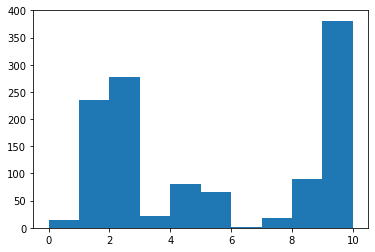

1183
2937
wyglądają podobnie niestety
[10  1 10 ... 10  0  1]


In [14]:
bought_with_discount = bought[bought["offered_discount"] != 0]
successful_sessions_with_discount = sessions[sessions["session_id"].isin(bought_with_discount["session_id"])]
successful_views_count_with_discount = successful_sessions_with_discount.groupby("session_id")["user_id"].agg('count') - 1
plt.figure()
_ = plt.hist(successful_views_count_with_discount.values)
plt.show()
print(bought_with_discount.shape[0])
print(bought.shape[0])
print("wyglądają podobnie niestety")
print(successful_views_count_with_discount.values)

ValueError: x and y must have same first dimension, but have shapes (11,) and (1183,)

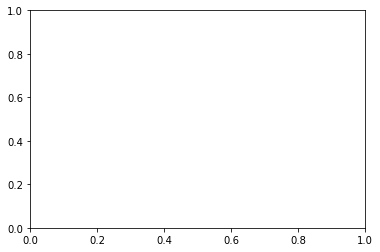

In [13]:
plt.figure()
import numpy as np
_ = plt.plot(successful_views_count_with_discount.values, successful_views_count_with_discount.values / successful_views_count_with_discount.values.sum() * 100 )
plt.show()